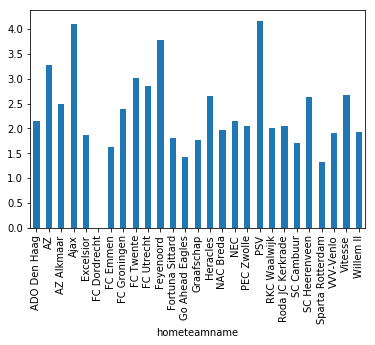

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
client = MongoClient("localhost", 27017, maxPoolSize=50)
db = client.book
collection = db['FullTimeMatches']
cursor = collection.find()
df =  pd.DataFrame(list(cursor))
pd.set_option('display.max_rows', 5000)
pd.options.display.max_columns = None
df_Eredevisie =  df[df.league_name == 'Eredivisie'  ]

df_Eredevisie.groupby(['differenceAt75'])['goalScoredLast15'].sum() / df_Eredevisie.groupby(['differenceAt75']).size()
#54% at -1 , 52% @ 1 

# differenceAt75 , awayGoalsUpTo75 
# more than 53% when -1,1 and awaygoals = 1,2 
df_Eredevisie.groupby(['differenceAt75','awayGoalsUpTo75'])['goalScoredLast15'].sum() / df_Eredevisie.groupby(['differenceAt75','awayGoalsUpTo75']).size()



# this for PSV home  returns when -1 and HGU75 = 0 or 1 returns 75%-85%
# size is 7 + 4 
df_Eredevisie.groupby(['differenceAt75','homeGoalsUpTo75'])['goalScoredLast15'].sum() / df_Eredevisie.groupby(['differenceAt75','homeGoalsUpTo75']).size()
# both  illustrate that when diff = 0 chances are @45%

# per home  team (60-75%)
df_Eredevisie.groupby(['hometeamname','differenceAt75'])['goalScoredLast15'].sum() / df_Eredevisie.groupby(['hometeamname','differenceAt75']).size()
# check sizes 
df_Eredevisie.groupby(['hometeamname','differenceAt75'])['goalScoredLast15'].size()

# per away  team (75% for some teams
df_Eredevisie.groupby(['awayteamname','differenceAt75'])['goalScoredLast15'].sum() / df_Eredevisie.groupby(['awayteamname','differenceAt75']).size()
# check sizes 
df_Eredevisie.groupby(['awayteamname','differenceAt75'])['goalScoredLast15'].size()



df_minimal_Eredevisie = df_Eredevisie[[ 'startingatwithtime', 'hometeamname','awayteamname'
                                        ,'HomeTeamWhileHomeAverageAttackUpTo75'
                                        ,'HomeTeamWhileHomeAverageDefenceUpTo75'
                                        ,'HomeTeamWhileHomeAverageAttackLast15'
                                        ,'HomeTeamWhileHomeAverageDefenceLast15'
                                        ,'AwayTeamWhileAwayAverageAttack'
                                        ,'AwayTeamWhileAwayAverageDefence'
                                        ,'HomeTeamWhileHomeAverageDefence'
                                        ,'HomeTeamWhileHomeAverageAttack'
                                        ,'AwayTeamWhileAwayAverageAttackUpTo75'
                                        ,'AwayTeamWhileAwayAverageDefenceUpTo75'
                                        ,'AwayTeamWhileAwayAverageAttackLast15'
                                        ,'AwayTeamWhileAwayAverageDefenceLast15'
                                        ,'differenceAt75'
                                        ,'reddifferenceAt75'
                                        ,'BucketedAwayTeamWhileAwayAverageAttack'
                                        ,'BucketedAwayTeamWhileAwayAverageDefence'
                                        ,'BucketedHomeTeamWhileHomeAverageAttack'
                                        ,'BucketedHomeTeamWhileHomeAverageDefence'
                      
                                        ,'goalScoredLast15'  
                                      ]].copy()

df_minimal_Eredevisie.groupby(['hometeamname'])['BucketedHomeTeamWhileHomeAverageAttack'].mean().plot(kind='bar')



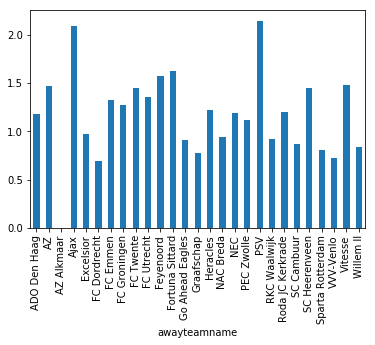

In [14]:
df_minimal_Eredevisie.groupby(['awayteamname'])['AwayTeamWhileAwayAverageAttack'].mean().plot(kind='bar')



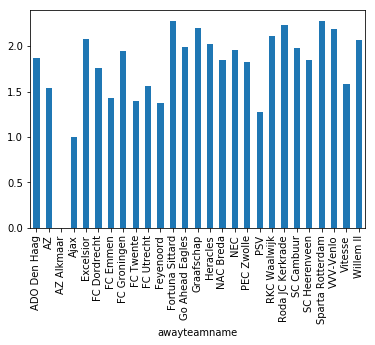

In [11]:
df_minimal_Eredevisie.groupby(['awayteamname'])['AwayTeamWhileAwayAverageDefence'].mean().plot(kind='bar')


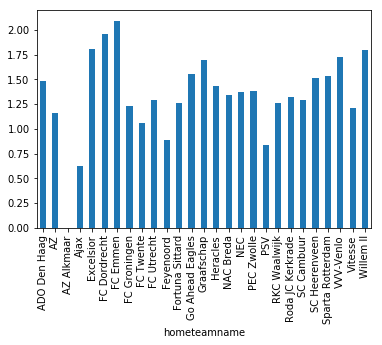

In [16]:
df_minimal_Eredevisie.groupby(['hometeamname'])['HomeTeamWhileHomeAverageDefence'].mean().plot(kind='bar')
